# Simulation of Using a BVM to inflate a lung

The idea of this simulation is to provide some initial test data in order to be able to begin algorithm development.

Most of the approximations here are extremely crude, the intent is to refine these on an ongoing basis.

## Lung pressure (Alveolar Pressure)
We assume that the lung simply expands with perfect elasticity to accomodate gas volume, thus keeping the pressure constant.

We're also treating the lung volume as being essentially infinite (relative to a 500ml tidal volume, this seems reasonable)

In [1]:
def lung_pressure():
    return 1  

## BVM compression and internal pressure

I'll add a proper model soon to relate the "squeezer" position to the compression (volume reduction) of the bag. For now, I'm simply introducing a "compression" factor (0 for no compression and 1 for full compression)

We normalise the pressure in the bag to be relative to atmospheric pressure

In [2]:
# I'm just making up numbers here o_0
bvm_initial_volume=1000
bvm_content=1000

def bvm_volume(bvm_compression):
    return bvm_initial_volume * (1-bvm_compression)

def bvm_pressure(bvm_compression):
    return bvm_content / bvm_volume(bvm_compression)

## Airflow into the lungs

Airflow into the lungs seems to be usually modeled using a simple "ohms law" equation, where the airflow resistance relates pressure difference to the flow rate

https://www.sciencedirect.com/topics/medicine-and-dentistry/airway-resistance

*TODO*: I need to fix all the units so that we can use the "normal" 0.5 - 1.5 cm H2O / mL / sec values and units for this quantity

In [3]:
airway_resistance=0.01
def airflow(bvm_pressure):
    # https://en.wikipedia.org/wiki/Airway_resistance
    return (bvm_pressure - lung_pressure())/airway_resistance


## Squeezing the Bag

Starting with a really simple model: squeeze the bag down to 1/4 of it's volume in 1s, then hold.

we use 0 for no compression, 1 for completely flat

In [4]:
# return 0 for no compression, 1 for completely flat
def bvm_compression(time_in_seconds):
  # bag compresses to 25% of original volume, then stops
  return 0.75 if (time_in_seconds > 1) else (0.75 * time_in_seconds)

## Numerical integration

Now that we've got all the physics set up, we can do some simulation.  We're going to squeeze the bag and integrate the airflow out of the bag and into the lungs.

normalise lung volume to starting point

In [5]:
flows=[]
pressures=[]
lung_pressures=[]
lung_volumes=[]
delta_t=0.1

lung_volume=0
for i in range(100):
    current_bvm_pressure = bvm_pressure(bvm_compression(i * delta_t))    
    current_flow=airflow(current_bvm_pressure)
    
    bvm_content = bvm_content - current_flow * delta_t
    lung_volume = lung_volume + current_flow * delta_t

    flows.append(current_flow)
    pressures.append(current_bvm_pressure)
    lung_volumes.append(lung_volume)


Text(0.5, 1.0, 'Airflow')

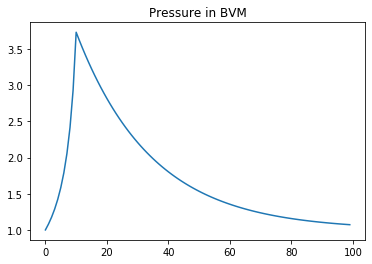

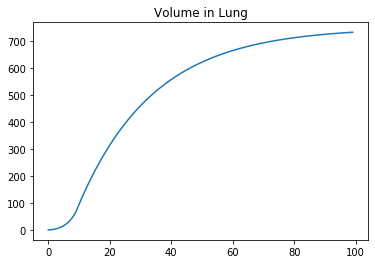

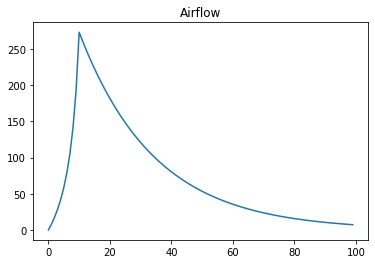

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
    
fig, ax = plt.subplots()
ax.plot(pressures)
ax.set_title('Pressure in BVM')

fig, ax = plt.subplots()
ax.plot(lung_volumes)
ax.set_title('Volume in Lung')


fig, ax = plt.subplots()
ax.plot(flows)
ax.set_title('Airflow')